# Abstract

**Objective**: Find efficient and Pythonic way of merging an arbitrary number of dictionaries.

**Methods**:
- Follow the suggestions here: http://treyhunner.com/2016/02/how-to-merge-dictionaries-in-python/.
- Define the functions, run unit tests and measure execution time

**Conclusions**: Based on the execution time, the fastest to the slowest function is:
1. `concat_dicts__update`
1. `concat_dicts__dict_comprehension`
1. `concat_dicts__concat_items_chain_from_iterable` & `concat_dicts__concat_items_chain`
1. `concat_dicts__concat_items_sum`
1. `concat_dicts__chainmap`

One might say that this order is the same based on legibility or elegance.

# Initialize

In [1]:
import itertools
from collections import ChainMap

import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
plt.style.use('ggplot')

# Define functions

In [3]:
def concat_dicts__update(*d):
    concatenated = {}
    for dd in d:
        concatenated.update(dd)
    return concatenated

def concat_dicts__dict_comprehension(*d):
    return {kk: vv for dd in d for kk, vv in dd.items()}

def concat_dicts__concat_items_sum(*d):
    return dict(sum([list(dd.items()) for dd in d], []))

def concat_dicts__concat_items_chain_from_iterable(*d):
    return dict(itertools.chain.from_iterable([dd.items() for dd in d]))

def concat_dicts__concat_items_chain(*d):
    return dict(itertools.chain(*[dd.items() for dd in d]))

def concat_dicts__chainmap(*d):
    return dict(ChainMap(*d[::-1]))

# All functions. The order is based on the timing result
ALL_FUNCTIONS = (concat_dicts__update,
                 concat_dicts__dict_comprehension,
                 concat_dicts__concat_items_chain_from_iterable,
                 concat_dicts__concat_items_chain,
                 concat_dicts__concat_items_sum,
                 concat_dicts__chainmap)

# Run unit tests

In [4]:
# input
d1 = {'a': 1, 'b': 2}
d1_1 = {'b': 21}
d2 = {'x': 3, 9: 99}

# concatenate `d1` and `d1_1`
expected1 = {'a': 1, 'b': 21}

# concatenate `d1`, `d1_1` and `d2`
expected2 = {'a': 1, 'b': 21, 'x': 3, 9: 99}

print('Running tests...')
for fn in ALL_FUNCTIONS:
    result1 = fn(d1, d1_1)
    result2 = fn(d1, d1_1, d2)
    assert expected1 == result1, ('function = {fn:s}\n'
                                  'expected = {expected}\n'
                                  'result   = {result}'
                                  ''.format(fn=fn.__name__,
                                            expected=expected1,
                                            result=result1))
    assert expected2 == result2, ('function = {fn:s}\n'
                                  'expected = {expected}\n'
                                  'result   = {result}'
                                  ''.format(fn=fn.__name__,
                                            expected=expected2,
                                            result=result2))
    print('{fn:s}: OK!'.format(fn=fn.__name__))

Running tests...
concat_dicts__update: OK!
concat_dicts__dict_comprehension: OK!
concat_dicts__concat_items_chain_from_iterable: OK!
concat_dicts__concat_items_chain: OK!
concat_dicts__concat_items_sum: OK!
concat_dicts__chainmap: OK!


# Execution time

In [5]:
t1 = []
t2 = []
for fn in ALL_FUNCTIONS:
    print(fn.__name__)
    t_fn = %timeit -o fn(d1, d1_1)
    t1.append(t_fn.timings)
    t_fn = %timeit -o fn(d1, d1_1, d2)
    t2.append(t_fn.timings)
    print('--------------------------------------------------------------------')

concat_dicts__update
665 ns ± 8.59 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
935 ns ± 42.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
--------------------------------------------------------------------
concat_dicts__dict_comprehension
930 ns ± 5.97 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.28 µs ± 14.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
--------------------------------------------------------------------
concat_dicts__concat_items_chain_from_iterable
1.74 µs ± 42.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.02 µs ± 14.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
--------------------------------------------------------------------
concat_dicts__concat_items_chain
1.74 µs ± 22.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.04 µs ± 4.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
---------------------------------------------------------

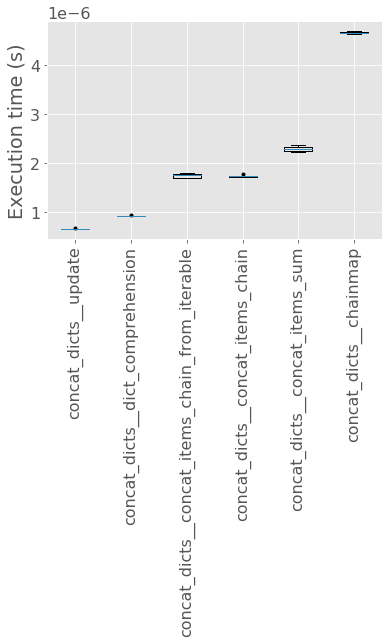

In [6]:
# define params
fontsize = 16

# create figure
fig, ax = plt.subplots()

# plot
ax.boxplot(t1, sym='k.')

# grid
ax.grid(True)

# x-axis
ax.set_xticklabels([f.__name__ for f in ALL_FUNCTIONS],
                   rotation=90, fontsize=fontsize);

# y-axis
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.tick_params(axis='y', labelsize=fontsize)
ax.yaxis.offsetText.set_fontsize(fontsize)  # size of the exponent
ax.set_ylabel('Execution time (s)', fontsize=fontsize*1.2)